In [50]:
from collections import Counter
import os
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['pdf.fonttype'] = 42

import mgitools.os_helpers as os_helpers

### 3d overlayed PCA projection

In [89]:
execution_dir = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/hua/pdx/execution/'
panel = '/gscmnt/gc2508/dinglab/estorrs/ancestry/data/integrated_call_samples_v3.20130502.ALL.panel'

threed_output = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/hua/pdx/execution/3d_pca.pdf'
twod_output = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/hua/pdx/execution/2d_pca.pdf'

In [84]:
execution_dir = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/yize/sample_mismatch/'
panel = '/gscmnt/gc2508/dinglab/estorrs/ancestry/data/integrated_call_samples_v3.20130502.ALL.panel'

threed_output = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/yize/sample_mismatch/3d_pca.pdf'
twod_output = '/gscmnt/gc2508/dinglab/estorrs/ancestry/executions/yize/sample_mismatch/2d_pca.pdf'

In [96]:
predictions = pd.read_csv(sorted(os_helpers.listfiles(execution_dir, regex=r'sub.*predictions.tsv$'))[0],
                         sep='\t', index_col='sample_id')
sample_pcs = pd.read_csv(sorted(os_helpers.listfiles(execution_dir, regex=r'sub.*samples.pcs$'))[0],
                         sep='\t', header=None, index_col=0)
sample_pcs.columns = [f'PC{c}' for c in sample_pcs.columns]
samples = pd.merge(predictions, sample_pcs, left_index=True, right_index=True)

samples

,predicted_ancestry,probability_ACB,probability_ASW,probability_BEB,probability_CDX,probability_CEU,probability_CHB,probability_CHS,probability_CLM,probability_ESN,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
sample_id,,,,,,,,,,,,,,,,,,,,,
0900570-T_HCI-002_Patient_tumor,IBS,0.01,0.02,0.00,0.00,0.10,0.00,0.00,0.02,0.00,...,0.352418,-0.327956,-0.150199,0.444382,-0.129678,-0.778536,-2.947987,-2.687162,-1.114332,-0.192075
0900642-T_HCI-009_Patient_tumor,IBS,0.00,0.01,0.00,0.00,0.02,0.00,0.02,0.06,0.00,...,-0.643355,1.925763,-2.515419,2.482189,-1.703001,0.288714,-2.450691,-0.041046,-0.813334,-1.173956
0903211-B_HCI-010_Patient_normal,PUR,0.04,0.08,0.00,0.00,0.04,0.00,0.00,0.17,0.00,...,1.952025,-1.323512,2.107931,-1.246392,-1.463729,0.856540,-1.300943,-2.321491,-2.532141,0.305752
0903293-T_HCI-003_Patient_tumor,IBS,0.00,0.02,0.00,0.00,0.08,0.00,0.00,0.01,0.00,...,-1.327749,0.624263,-1.166243,0.805918,-0.490370,-1.143870,-1.471893,-0.502312,-1.566755,-0.406570
0907163-T_HCI-011_Patient_tumor,MXL,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.06,0.00,...,0.667350,0.896958,2.650462,-4.163414,-2.660399,-0.983660,1.410190,-1.035196,-0.108896,-1.609128
1007649-B_HCI-008_Patient_normal,IBS,0.01,0.02,0.00,0.00,0.06,0.00,0.00,0.05,0.00,...,-1.915804,0.434968,-1.407451,-1.238132,-1.261084,1.493709,-1.223187,0.929227,-1.487440,-1.043187
10960X16_HCI012_PDXtumor_P4,IBS,0.02,0.01,0.00,0.00,0.04,0.00,0.01,0.10,0.00,...,4.500632,0.308506,1.008483,2.337175,-0.182880,-0.238913,-4.257605,-0.883819,0.322835,-0.210914
114348_004_R_ATH_v2_0_1_51_0_WES,IBS,0.01,0.00,0.00,0.00,0.13,0.00,0.01,0.08,0.00,...,0.324041,1.314859,-0.325108,-0.697747,-1.712265,1.252214,-0.503790,-1.324990,0.395629,1.019746
114434_197_R_ORIGINATOR_v1_2_WES,IBS,0.01,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,...,1.116239,-0.255454,1.213545,1.365810,-0.941046,2.116072,-1.525048,2.635149,-2.129299,-0.227175


In [97]:
thousand = pd.read_csv(sorted(os_helpers.listfiles(execution_dir, regex=r'sub.*training.pcs$'))[0],
                         sep='\t', header=None, index_col=0)
thousand.columns = [f'PC{c}' for c in thousand.columns]
metadata = pd.read_csv(panel, sep='\t', index_col='sample')
thousand = pd.merge(thousand, metadata, right_index=True, left_index=True)

thousand

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
NA19067,-27.440976,36.291604,-6.547847,-6.191820,8.258949,15.307626,-4.313494,-2.262591,0.534408,3.292427,...,0.185753,-1.298604,-0.394473,-0.843516,4.441142,JPT,EAS,male,NaN,NaN
HG01061,-12.475299,-22.112529,-13.369061,-1.538459,3.736568,0.107320,-0.680043,-11.865545,-3.274076,-1.353034,...,-3.796839,0.313521,5.447171,0.224302,-1.928696,PUR,AMR,female,NaN,NaN
NA18856,58.332832,5.194556,-2.975687,-3.730961,17.288503,2.391020,-4.067489,-0.240651,6.617287,-2.679846,...,5.594155,-1.347175,-2.952043,-0.100800,2.093219,YRI,AFR,male,NaN,NaN
NA12830,-17.645858,-29.557840,-11.143151,-8.328099,1.721884,0.963131,4.281090,-3.059484,-0.474352,-0.251808,...,4.736278,-5.215066,-1.385590,-0.449814,0.832918,CEU,EUR,female,NaN,NaN
HG02379,-26.321302,35.690301,-3.436001,-9.767226,5.982522,-15.792043,-4.077064,2.860590,3.105178,1.328464,...,4.482788,5.696561,5.886261,-1.533214,0.318897,CDX,EAS,male,NaN,NaN
HG03863,-17.634548,-8.015457,25.943012,3.939582,1.038765,0.523949,2.250433,-4.573705,-2.512448,6.875057,...,7.441524,5.159346,1.590936,8.997552,3.556720,ITU,SAS,female,NaN,NaN
HG01669,-12.178514,-27.888995,-7.609849,-7.915677,-8.417965,0.639976,-2.610225,-0.090903,4.789137,2.759409,...,4.173918,-3.054617,2.117642,4.541009,-2.403552,IBS,EUR,male,NaN,NaN
HG01565,-21.095963,-0.733777,-16.453768,32.087150,-4.514100,-0.743599,-3.556325,2.621063,4.318673,7.217446,...,1.241800,-4.622174,2.996710,-0.326097,-4.317987,PEL,AMR,male,NaN,NaN
HG03583,58.626949,6.136364,0.323800,-0.306206,-4.261857,-2.105669,-0.659333,-2.064122,-8.591948,-2.001002,...,-1.104725,-7.131140,-3.688646,-0.046241,-0.442962,MSL,AFR,female,NaN,NaN
NA19318,54.144238,4.435166,0.833768,-0.819278,-1.886264,1.486054,5.547324,0.444813,16.611205,2.698750,...,2.270638,-3.910802,-4.600438,-0.415294,-3.646005,LWK,AFR,male,NaN,NaN


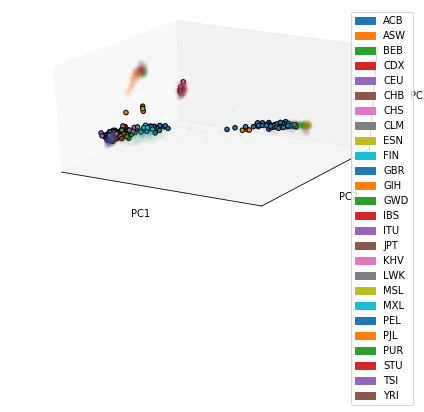

In [101]:
# plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
p = sns.color_palette()
p += p
p += p
cmap = {label:p[i] for i, label in enumerate(sorted(set(thousand['pop'])))}

cs = [cmap[a] for a in samples['predicted_ancestry']]
ax.scatter(samples['PC1'], samples['PC2'], samples['PC3'], c=cs, alpha=1., edgecolor='black')

cs = [cmap[a] for a in thousand['pop']]
ax.scatter(thousand['PC1'], thousand['PC2'], thousand['PC3'], c=cs, alpha=.02)



ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

patches = [mpatches.Patch(color=cmap[a], label=a) for a in sorted(set(thousand['pop']))]
plt.legend(handles=patches)


plt.tight_layout()

plt.savefig(threed_output)


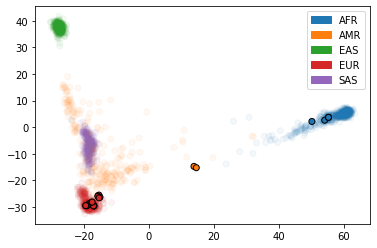

In [88]:
cmap = {label:sns.color_palette()[i] for i, label in enumerate(sorted(set(thousand['super_pop'])))}

cs = [cmap[a] for a in thousand['super_pop']]
plt.scatter(thousand['PC1'], thousand['PC2'], alpha=.05, c=cs)
cs = [cmap[a] for a in samples['predicted_ancestry']]
plt.scatter(samples['PC1'], samples['PC2'], alpha=1., c=cs, edgecolor='black')

patches = [mpatches.Patch(color=cmap[a], label=a) for a in sorted(set(thousand['super_pop']))]
plt.legend(handles=patches)

plt.savefig(twod_output)

In [2]:
ANCESTRY_EXECUTION_DIR = '/gscmnt/gc2508/dinglab/estorrs/cptac3/ancestry_execution'

CLINICAL_DIR = '/gscmnt/gc2508/dinglab/estorrs/cptac3/clinical'

THOUSAND_GENOMES_PANEL = '/gscmnt/gc2508/dinglab/estorrs/ancestry/data/integrated_call_samples_v3.20130502.ALL.panel'

OUTPUT_DIR = '/gscmnt/gc2508/dinglab/estorrs/cptac3/temp'

### gather thousand genomes pcs

In [3]:
fps = os_helpers.listfiles(ANCESTRY_EXECUTION_DIR)

for fp in fps:
    if 'thousand_genomes.training.pcs' in fp and 'super_population' in fp and 'hg19' not in fp and 'ccrcc' in fp:       
        thousand_genomes_df = pd.read_csv(fp, sep='\t', header=None)
        thousand_genomes_df.columns = ['sample_id'] + ['PC' + str(i) for i in range(1, thousand_genomes_df.shape[1])]

thousand_genomes_df.head()


,sample_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,HG02401,-29.168070,41.197321,-4.154701,-6.702857,-1.556249,-3.586795,-16.009155,-4.428462,-0.790479,...,-0.729211,0.054782,6.248679,0.637410,4.222202,5.015117,2.710292,-6.046346,-0.701900,1.583800
1,HG03757,-19.971434,-3.292087,29.049237,3.739632,2.826740,-7.281577,3.027365,6.695643,2.716380,...,0.902587,1.897555,-11.329841,-10.585464,0.515323,-2.545012,-0.028030,-6.027935,-2.904151,6.903630
2,NA19404,58.048182,3.920899,0.619350,-0.173918,-4.320377,-7.859925,7.931751,2.335033,-6.969509,...,1.047886,8.274666,-0.271638,12.308544,-4.170294,-1.750947,9.204739,-8.476967,-2.268372,-4.158326
3,HG03969,-18.513273,-7.442657,27.083876,4.935952,1.933885,6.301043,-2.671554,-4.359086,-3.236539,...,4.350108,1.519568,1.556352,6.782942,-0.643735,-5.933232,10.131946,2.702515,3.220568,4.915861
4,HG01465,-18.989422,-21.235853,-13.469394,1.534066,6.944427,3.087336,-4.830674,8.973313,-13.255981,...,8.458348,2.030916,-0.785425,-7.793122,-4.733272,1.719047,-5.750154,0.237253,0.207229,-6.920287


In [4]:
f = open(THOUSAND_GENOMES_PANEL)
f.readline()

sample_to_ancestry = {}
for line in f:
    pieces = line.split('\t')
    sample_to_ancestry[pieces[0]] = pieces[2]
f.close()

ancestries = [sample_to_ancestry[s] for s in thousand_genomes_df['sample_id']]
thousand_genomes_df['ancestry'] = ancestries

### gather predictions and principle components

In [5]:
fps = os_helpers.listfiles(ANCESTRY_EXECUTION_DIR)

cancer_type_to_predictions_df = {}
for fp in fps:
    if 'predictions.tsv' in fp and 'super_population' in fp:
        if 'hg19' in fp and len([x for x in ['/ov/', '/co/', '/brca/'] if x in fp]) == 0:
            pass
        else:
            cancer_type = re.sub(r'^.*cptac3/ancestry_execution/(.*)/(hg|ancestry_prediction).*$', r'\1', fp)
            cancer_type = cancer_type.split('/')[0]

            df = pd.read_csv(fp, sep='\t')
            cancer_type_to_predictions_df[cancer_type] = df
len(cancer_type_to_predictions_df), cancer_type_to_predictions_df.keys()

(8, dict_keys(['ucec', 'brca', 'gbm', 'co', 'ov', 'pdac', 'luad', 'ccrcc']))

In [6]:
fps = os_helpers.listfiles(ANCESTRY_EXECUTION_DIR)

cancer_type_to_pcs_df = {}
for fp in fps:
    if 'samples.pcs' in fp and 'super_population' in fp:
        if 'hg19' in fp and len([x for x in ['/ov/', '/co/', '/brca/'] if x in fp]) == 0:
            pass
        else:
            cancer_type = re.sub(r'^.*cptac3/ancestry_execution/(.*)/(hg|ancestry_prediction).*$', r'\1', fp)
            cancer_type = cancer_type.split('/')[0]

            df = pd.read_csv(fp, sep='\t', header=None)
            df.columns = ['sample_id'] + ['PC' + str(i) for i in range(1, df.shape[1])]
            cancer_type_to_pcs_df[cancer_type] = df
len(cancer_type_to_pcs_df), cancer_type_to_pcs_df.keys()

(8, dict_keys(['ucec', 'brca', 'gbm', 'co', 'ov', 'pdac', 'luad', 'ccrcc']))

In [7]:
cancer_type_to_predictions_df['co'].head()

,sample_id,predicted_ancestry,probability_AFR,probability_AMR,probability_EAS,probability_EUR,probability_SAS
0,01CO001,EUR,0.01,0.05,0.03,0.90,0.01
1,01CO005,EUR,0.00,0.01,0.00,0.99,0.00
2,01CO006,EUR,0.00,0.00,0.00,1.00,0.00
3,01CO008,AFR,0.99,0.01,0.00,0.00,0.00
4,01CO013,EUR,0.01,0.01,0.01,0.97,0.00


In [8]:
cancer_type_to_predictions_df['co'].shape

(106, 7)

In [9]:
cancer_type_to_pcs_df['ccrcc'].head()

,sample_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,C3L-00004,-19.336754,-28.900345,-10.077240,-7.098446,-6.719069,-0.507107,0.061844,-1.881328,-0.581237,...,0.629510,2.264658,4.200580,2.122622,0.680656,-0.012481,-0.386858,2.238509,-0.263252,-0.260414
1,C3L-00010,-19.672863,-20.605821,-7.872314,6.451843,-4.047004,3.387953,-4.359236,-2.139261,-0.811702,...,4.863699,0.587534,1.336306,2.214468,3.191374,-1.499340,1.397522,2.630294,-0.120671,0.487232
2,C3L-00011,-18.947179,-30.641938,-5.646904,-6.817749,-5.977497,2.765075,-1.287793,2.251035,0.322644,...,-2.679329,-1.186665,2.700208,1.570516,-2.180879,-1.047527,-4.078006,1.356230,-2.281104,2.278053
3,C3L-00026,-18.629733,-31.474097,-7.018578,-6.896202,-6.209261,-1.268213,1.067146,1.879837,2.978434,...,1.780084,-0.049990,-2.409043,0.973506,-0.330933,1.809621,-2.461939,1.700897,0.472718,0.760467
4,C3L-00079,-17.689462,-30.212205,-7.687420,-6.362483,-6.675981,1.466651,0.140848,-3.466252,0.099988,...,-1.016144,-0.344442,-2.555094,3.090970,-0.564134,-0.755834,-0.876302,2.931468,-3.917310,0.576128


In [10]:
cancer_type_to_predictions_df['ccrcc'].merge(cancer_type_to_pcs_df['ccrcc'], on=['sample_id'])

,sample_id,predicted_ancestry,probability_AFR,probability_AMR,probability_EAS,probability_EUR,probability_SAS,PC1,PC2,PC3,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,C3L-00004,EUR,0.00,0.00,0.00,1.00,0.00,-19.336754,-28.900345,-10.077240,...,0.629510,2.264658,4.200580,2.122622,0.680656,-0.012481,-0.386858,2.238509,-0.263252,-0.260414
1,C3L-00010,AMR,0.03,0.90,0.02,0.00,0.05,-19.672863,-20.605821,-7.872314,...,4.863699,0.587534,1.336306,2.214468,3.191374,-1.499340,1.397522,2.630294,-0.120671,0.487232
2,C3L-00011,EUR,0.00,0.00,0.02,0.98,0.00,-18.947179,-30.641938,-5.646904,...,-2.679329,-1.186665,2.700208,1.570516,-2.180879,-1.047527,-4.078006,1.356230,-2.281104,2.278053
3,C3L-00026,EUR,0.00,0.00,0.01,0.99,0.00,-18.629733,-31.474097,-7.018578,...,1.780084,-0.049990,-2.409043,0.973506,-0.330933,1.809621,-2.461939,1.700897,0.472718,0.760467
4,C3L-00079,EUR,0.00,0.00,0.01,0.99,0.00,-17.689462,-30.212205,-7.687420,...,-1.016144,-0.344442,-2.555094,3.090970,-0.564134,-0.755834,-0.876302,2.931468,-3.917310,0.576128
5,C3L-00088,EUR,0.00,0.06,0.02,0.92,0.00,-19.262595,-29.371101,-8.546380,...,1.267953,-0.079227,-3.832446,-0.877278,-0.469709,1.859726,-2.219694,0.535115,-0.520040,3.255984
6,C3L-00096,EUR,0.00,0.00,0.00,1.00,0.00,-18.055765,-29.241390,-8.010382,...,-1.021478,1.335966,-2.154426,0.499819,0.335292,-1.208960,-2.625939,-0.393479,-0.573983,-1.354391
7,C3L-00097,EUR,0.00,0.21,0.02,0.77,0.00,-18.643910,-29.944265,-10.004286,...,-1.129140,-0.119859,-1.294148,0.199259,1.040484,4.003548,-0.226053,0.076094,-0.512431,1.198663
8,C3L-00103,EUR,0.00,0.06,0.02,0.92,0.00,-18.390568,-30.443177,-8.338591,...,1.412728,-0.916638,-2.091697,1.017424,-0.968825,3.197940,1.311034,1.074540,-4.213205,-0.481832
9,C3L-00183,AMR,0.00,0.98,0.00,0.00,0.02,-18.364673,-6.271514,-10.727016,...,-0.837748,2.217987,1.095700,-0.236510,0.293838,-0.775799,-1.978432,1.167850,1.926649,-0.516589


In [11]:
cancer_type_to_df = {}
for k in cancer_type_to_predictions_df.keys():
    df = cancer_type_to_predictions_df[k].merge(cancer_type_to_pcs_df[k])
    cancer_type_to_df[k] = df

In [12]:
for k, df in cancer_type_to_df.items():
    print(k, df.shape)

ucec (136, 27)
brca (122, 27)
gbm (114, 27)
co (106, 27)
ov (102, 27)
pdac (77, 27)
luad (121, 27)
ccrcc (138, 27)


In [13]:
sample_ids = {s for df in cancer_type_to_df.values()
             for s in df['sample_id']}

### gather clinical data

In [14]:
cptac3_clinical_to_thousand_genomes = {
    'White': 'EUR',
    '': 'UNKNOWN',
    'Not Reported': 'UNKNOWN',
    'Unknown': 'UNKNOWN',
    'Unknown (Could not be determined or unsure)': 'UNKNOWN',
    'Not Evaluated': 'UNKNOWN',
    'Asian': 'EAS/SAS',
    'Black or African American': 'AFR',
    'American Indian or Alaska Native': 'AMR'
}

In [15]:
fps = os_helpers.listfiles(CLINICAL_DIR)

cancer_type_to_clinical_df = {}
for fp in fps:
    cancer_type = fp.split('/')[-1].split('.')[0]
    f = open(fp)
    f.readline()
    cols = ['sample_id', 'clinical_ancestry', 'converted_clinical_ancestry']
    data = []
    for line in f:
        pieces = line.strip().split('\t')
        
        if cancer_type not in ['ov', 'co', 'brca']:
            sample_id = pieces[0]
        else:
            try:
                sample_id = pieces[1]
            except IndexError:
                sample_id = 'blah'
            
        if sample_id in sample_ids:
            
            if cancer_type not in ['ov', 'co', 'brca']:
                ancestry = pieces[4]
            else:
                ancestry = pieces[10]
                
            data.append([sample_id, ancestry.strip(),
                         cptac3_clinical_to_thousand_genomes[ancestry.strip()]])
    
    df = pd.DataFrame(data=data, columns=cols)
    
    if cancer_type in cancer_type_to_df:
        cancer_type_to_clinical_df[cancer_type] = df

In [16]:
for k, df in cancer_type_to_clinical_df.items():
    print(k, df.shape)

brca (110, 3)
ucec (132, 3)
ov (101, 3)
pdac (76, 3)
co (104, 3)
ccrcc (138, 3)
gbm (114, 3)
luad (121, 3)


In [17]:
for k in cancer_type_to_clinical_df.keys():
#     if k == 'pda':
#         df = cancer_type_to_clinical_df[k].merge(cancer_type_to_df['pdac'])
#         cancer_type_to_df.pop('pdac')
#     if k in cancer_type_to_df:
    df = cancer_type_to_clinical_df[k].merge(cancer_type_to_df[k])
    cancer_type_to_df[k] = df

In [18]:
# cancer_type_to_clinical_df['ov']

In [19]:
for k, df in cancer_type_to_predictions_df.items():
    print(k, df.shape)

ucec (136, 7)
brca (122, 7)
gbm (114, 7)
co (106, 7)
ov (102, 7)
pdac (77, 7)
luad (121, 7)
ccrcc (138, 7)


In [20]:
for k, df in cancer_type_to_clinical_df.items():
    print(k, df.shape)

brca (110, 3)
ucec (132, 3)
ov (101, 3)
pdac (76, 3)
co (104, 3)
ccrcc (138, 3)
gbm (114, 3)
luad (121, 3)


In [21]:
# cancer_type_to_df['pda']

In [22]:
readable_ancestry = {
    'EUR': 'European',
    'AFR': 'African',
    'AMR': 'American',
    'SAS': 'South Asian',
    'EAS': 'East Asian',
    'EAS/SAS': 'East Asian/South Asian',
    'UNKNOWN': 'Unknown'
}

In [23]:
for k, df in cancer_type_to_df.items():
    df.columns = ['sample_id', 'clinical ancestry', 'cptac ancestry', 'predicted ancestry'] + list(df.columns[4:])
    
    df['cptac ancestry'] = [readable_ancestry.get(a, 'Unknown') for a in df['cptac ancestry']]
    df['predicted ancestry'] = [readable_ancestry.get(a, 'Unknown') for a in df['predicted ancestry']]
    
    df['cancer type'] = [k] * df.shape[0]

    cancer_type_to_df[k] = df

In [24]:
thousand_genomes_df['ancestry'] = [readable_ancestry[a] for a in thousand_genomes_df['ancestry']]

In [25]:
master_df = pd.concat(cancer_type_to_df.values())

In [26]:
master_df.shape

(896, 30)

In [27]:
master_df.head()

,sample_id,clinical ancestry,cptac ancestry,predicted ancestry,probability_AFR,probability_AMR,probability_EAS,probability_EUR,probability_SAS,PC1,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,cancer type
0,C3L-00006,White,European,European,0.00,0.00,0.0,1.00,0.0,-18.545867,...,-5.845663,4.607216,0.745899,-0.312103,-0.276559,0.681342,1.704377,0.227711,-0.144927,ucec
1,C3L-00008,White,European,European,0.00,0.01,0.0,0.99,0.0,-18.670865,...,-4.438590,1.819729,0.302457,-1.690332,1.699389,0.036378,0.019841,1.834582,-1.762034,ucec
2,C3L-00032,White,European,European,0.00,0.01,0.0,0.99,0.0,-18.444912,...,-2.747460,3.285627,0.642815,-3.084748,-2.157727,0.245279,-1.591275,-1.084840,2.477496,ucec
3,C3L-00086,White,European,European,0.00,0.00,0.0,1.00,0.0,-18.850494,...,-6.541527,7.240451,-1.358599,-0.662083,1.435248,-0.662176,0.040433,1.703343,-0.103553,ucec
4,C3L-00090,White,European,European,0.02,0.02,0.0,0.96,0.0,-19.104108,...,2.775622,1.012048,-2.698752,0.527007,-4.121088,0.404923,1.608367,-0.967085,-0.790548,ucec


## plotting

In [28]:
colors = {
    'African': '#1AC938',
    'American': '#E8000B',
    'East Asian': '#8B2BE2',
    'European': '#FF7C00',
    'South Asian': '#023EFF',
    'East Asian/South Asian': '#00D7FF',
    'Unknown': '#A3A3A3'
}

In [29]:
def plot_ancestry(master_df, hue, cancer_type):
    if cancer_type is not None:
        df = master_df[master_df['cancer type'] == cancer_type]
    else:
        df = master_df
    sns.pairplot(x_vars=["PC1"], y_vars=["PC2"], data=df, hue=hue, size=5, plot_kws={'s':60},
                palette=colors, hue_order=sorted(list(set(df[hue]))))
    plt.savefig(os.path.join(OUTPUT_DIR, f'{cancer_type}.{hue}.pdf'))
    plt.savefig(os.path.join(OUTPUT_DIR, f'{cancer_type}.{hue}.png'))

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


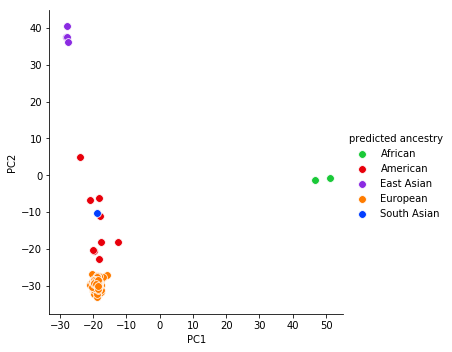

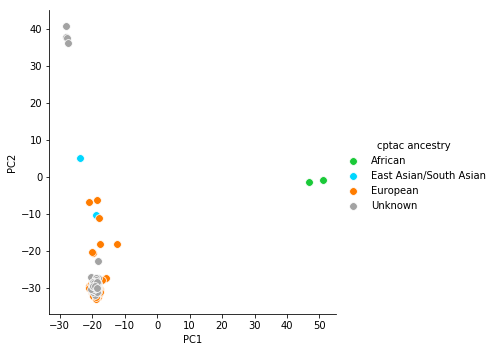

In [30]:
plot_ancestry(master_df, 'predicted ancestry', 'ccrcc')
plot_ancestry(master_df, 'cptac ancestry', 'ccrcc')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


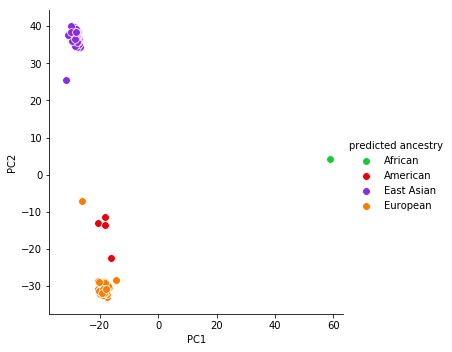

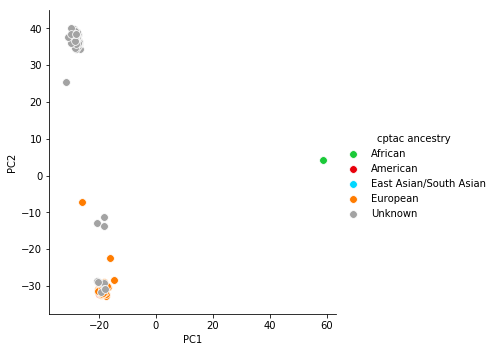

In [31]:
plot_ancestry(master_df, 'predicted ancestry', 'luad')
plot_ancestry(master_df, 'cptac ancestry', 'luad')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


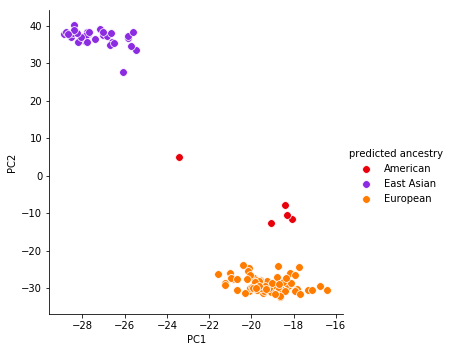

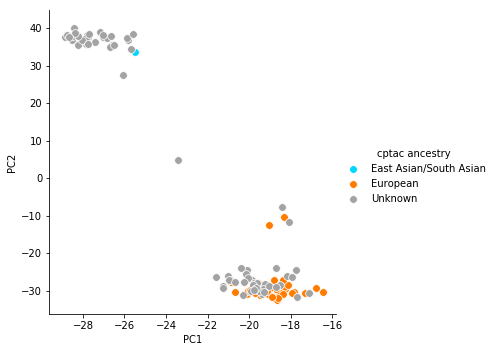

In [32]:
plot_ancestry(master_df, 'predicted ancestry', 'gbm')
plot_ancestry(master_df, 'cptac ancestry', 'gbm')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


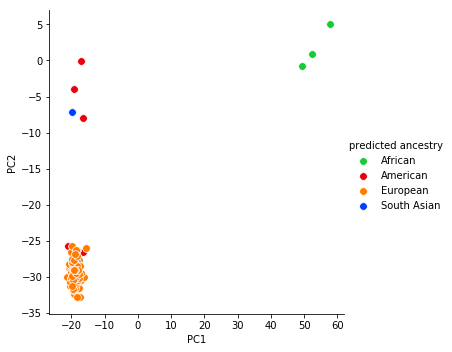

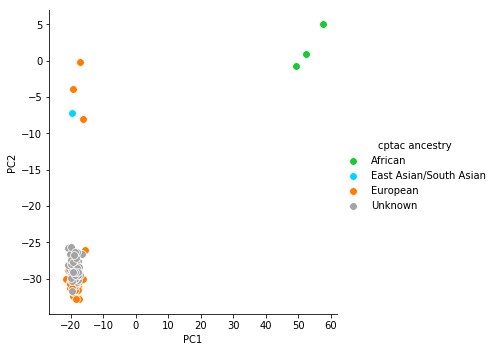

In [33]:
plot_ancestry(master_df, 'predicted ancestry', 'ucec')
plot_ancestry(master_df, 'cptac ancestry', 'ucec')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


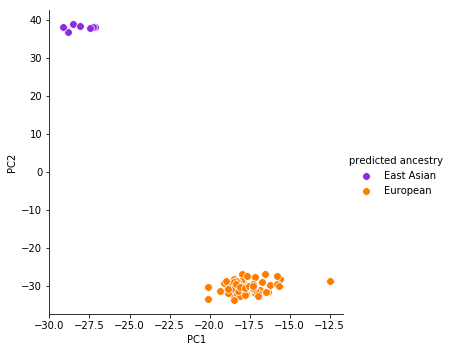

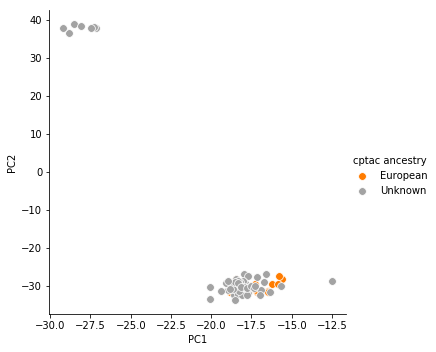

In [34]:
plot_ancestry(master_df, 'predicted ancestry', 'pdac')
plot_ancestry(master_df, 'cptac ancestry', 'pdac')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


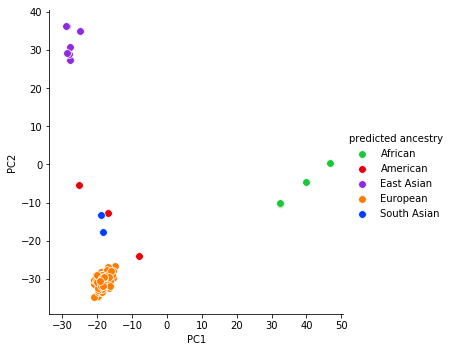

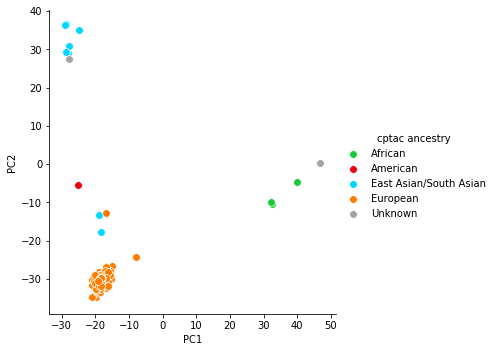

In [35]:
plot_ancestry(master_df, 'predicted ancestry', 'ov')
plot_ancestry(master_df, 'cptac ancestry', 'ov')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


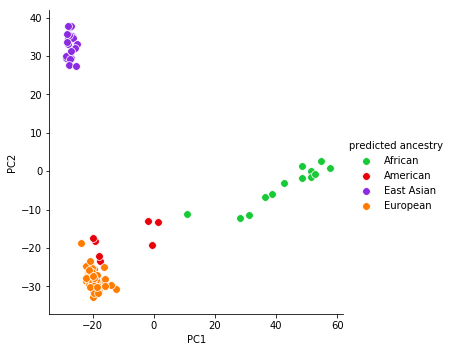

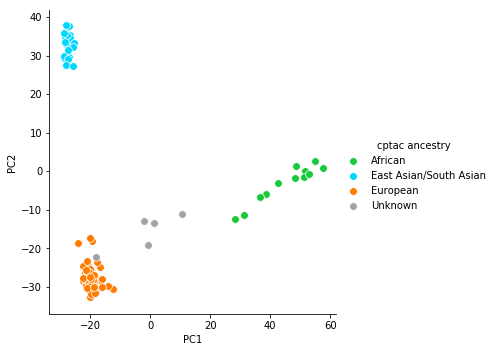

In [36]:
plot_ancestry(master_df, 'predicted ancestry', 'brca')
plot_ancestry(master_df, 'cptac ancestry', 'brca')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


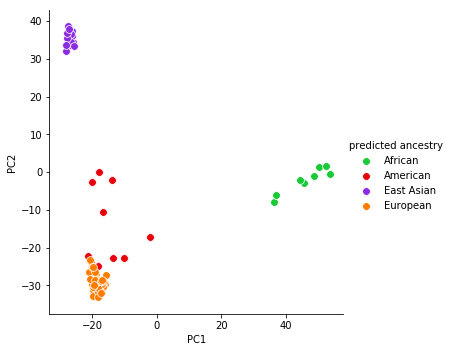

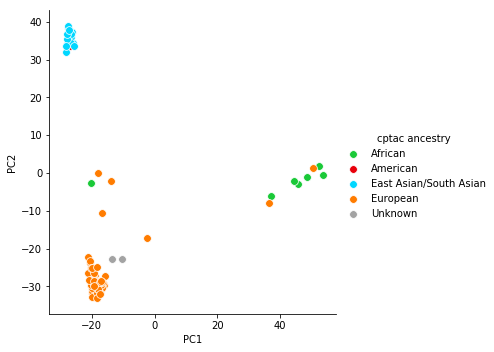

In [37]:
plot_ancestry(master_df, 'predicted ancestry', 'co')
plot_ancestry(master_df, 'cptac ancestry', 'co')

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


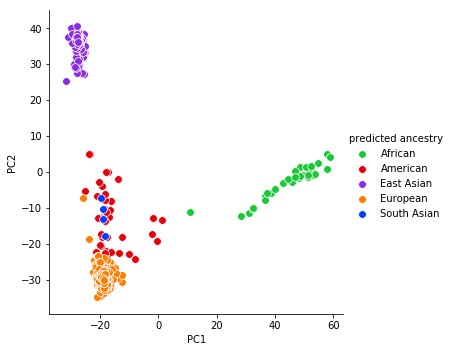

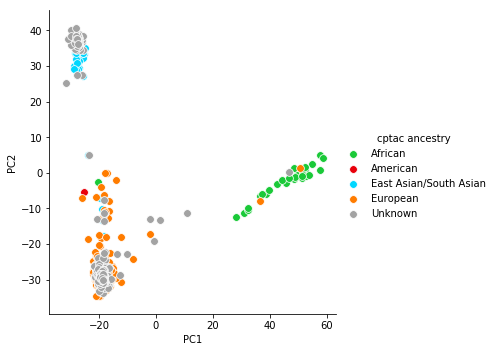

In [38]:
plot_ancestry(master_df, 'predicted ancestry', None)
plot_ancestry(master_df, 'cptac ancestry', None)

/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


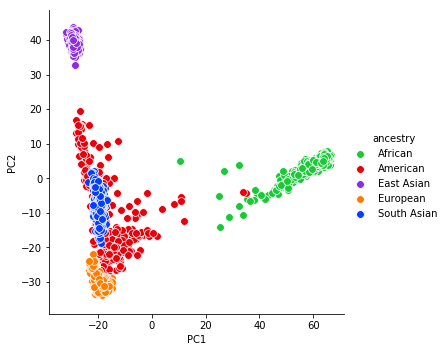

In [39]:
plot_ancestry(thousand_genomes_df, 'ancestry', None)

In [40]:
readable_ancestry = {
    'EUR': 'European',
    'AFR': 'African',
    'AMR': 'American',
    'SAS': 'South Asian',
    'EAS': 'East Asian',
    'EAS/SAS': 'East Asian/South Asian',
    'UNKNOWN': 'Unknown'
}

to_cptac = {
    'East Asian': 'East Asian/South Asian',
    'South Asian': 'East Asian/South Asian'
}

index = ['African', 'American', 'East Asian/South Asian', 'European', 'Unknown']
r_index = {x:i for i, x in enumerate(index)}

m = np.zeros(shape=(len(index), len(index)))
for i, row in master_df.iterrows():
    actual = row['cptac ancestry']
    predicted = to_cptac.get(row['predicted ancestry'], row['predicted ancestry'])
    
#     if actual != 'Unknown':
    m[r_index[predicted]][r_index[actual]] += 1
m

array([[ 27.,   0.,   0.,   2.,   2.],
       [  1.,   1.,   1.,  24.,  15.],
       [  0.,   1.,  48.,   0., 117.],
       [  0.,   1.,   0., 464., 192.],
       [  0.,   0.,   0.,   0.,   0.]])

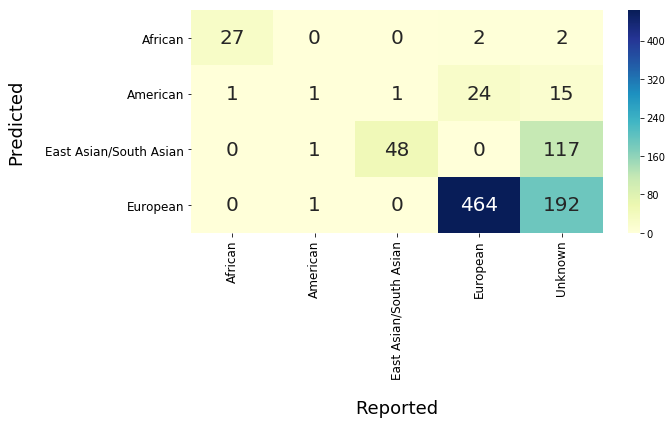

In [41]:
confusion_df = pd.DataFrame(data=m[:-1, :], index=index[:-1], columns=index)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(confusion_df, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
ax.set_xlabel('Reported', fontsize=18, labelpad=20)
ax.set_ylabel('Predicted', fontsize=18, labelpad=20)

ax.tick_params(labelsize=12)
plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.pdf'), dpi=300)
plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png'), dpi=300)

In [42]:
d = {
    'European': [],
    'African': [],
    'American': [],
    'South Asian': [],
    'East Asian': []
}

order = {k:i for i, k in enumerate(['gbm', 'pdac', 'ccrcc', 'luad', 'ucec', 'ov', 'brca'])}

c_t = set(master_df['cancer type'])

for cancer_type, df in cancer_type_to_df.items():
    ancestries = list(df['predicted ancestry'])
    c = Counter(ancestries)
    for ancestry, count in c.most_common():
        d[ancestry].append((cancer_type, count))
    
for ancestry, cancer_type_count_tups in d.items():
    s = {c for c, _ in cancer_type_count_tups}
    missing = c_t.difference(s)
    for cancer_type in missing:
        cancer_type_count_tups.append((cancer_type, 0))
        
    # remove co
    cancer_type_count_tups = [t for t in cancer_type_count_tups if t[0] != 'co']
        
    d[ancestry] = sorted(cancer_type_count_tups, key=lambda x: order[x[0]])

index = [x for x, _ in d['European']]
d = {a:[c for _, c in ls] for a, ls in d.items()}


In [43]:
plotting_df = pd.DataFrame.from_dict(d)
plotting_df.index = index
plotting_df

,European,African,American,South Asian,East Asian
gbm,76,0,5,0,33
pdac,69,0,0,0,7
ccrcc,122,2,9,1,4
luad,42,1,4,0,74
ucec,123,3,5,1,0
ov,85,4,3,2,7
brca,70,13,7,0,20


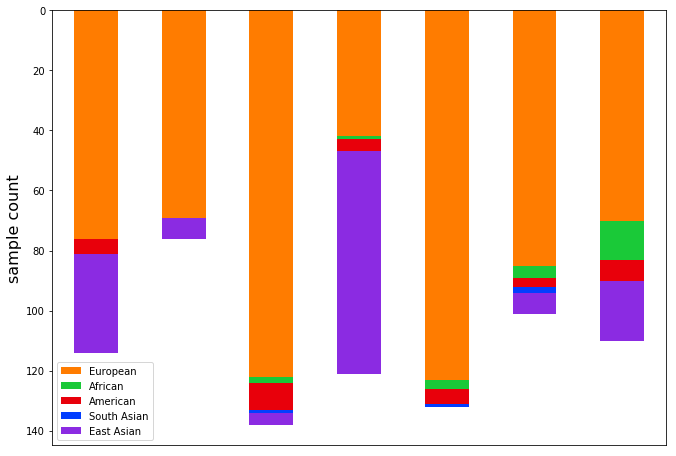

In [44]:
c = [colors[a] for a in plotting_df.columns]

plotting_df.plot.bar(stacked=True, color=c, figsize=(11,8))

plt.gca().invert_yaxis()

plt.ylabel('sample count', fontsize=16)
plt.xticks([])

plt.savefig(os.path.join(OUTPUT_DIR, 'ancestry_distribution.pdf'), dpi=300)
plt.savefig(os.path.join(OUTPUT_DIR, 'ancestry_distribution.png'), dpi=300)

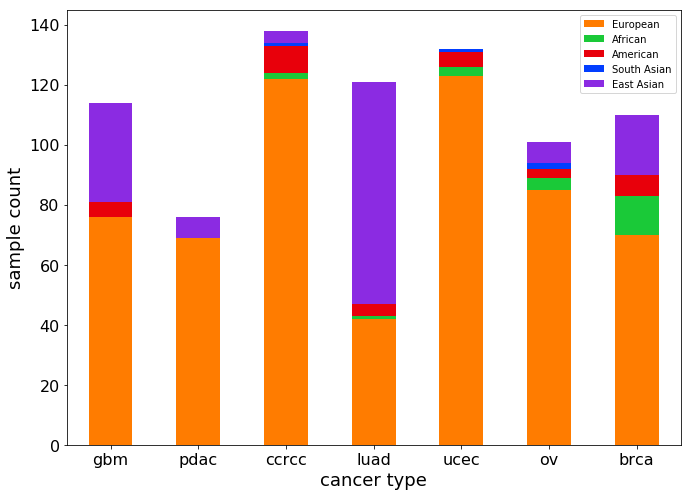

In [45]:
c = [colors[a] for a in plotting_df.columns]

plotting_df.plot.bar(stacked=True, color=c, figsize=(11,8))

plt.ylabel('sample count', fontsize=18)
plt.xlabel('cancer type', fontsize=18)

plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)


plt.savefig(os.path.join(OUTPUT_DIR, 'ancestry_distribution.pdf'), dpi=300)
plt.savefig(os.path.join(OUTPUT_DIR, 'ancestry_distribution.png'), dpi=300)